In [1]:
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision import models, transforms

In [2]:
# PyTorchのバージョン確認
print('PyTorch Version:',torch.__version__)
print('Torchvision Version:', torchvision.__version__)

PyTorch Version: 1.1.0
Torchvision Version: 0.3.0


Text(0.5, 1.0, 'origin')

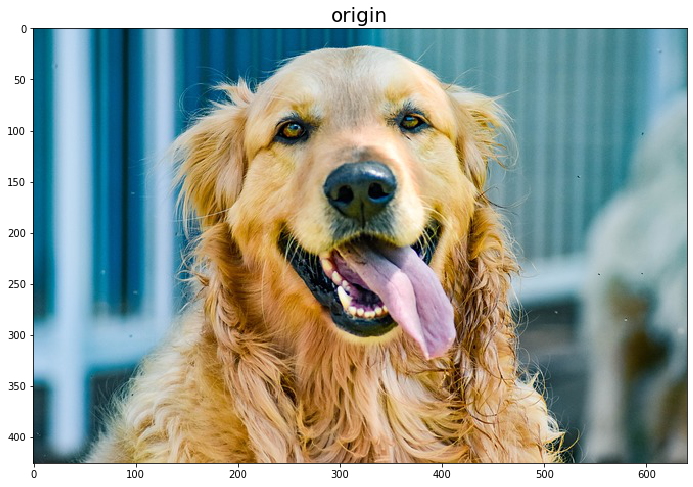

In [3]:
# 画像前処理の動作を確認
# 画像読み込み
image_file_path = './image/goldenretriever-3724972_640.jpg'
img = Image.open(image_file_path)  # [高さ][幅][色RGB]

# 元の画像の表示
plt.figure(figsize=(12,8))
plt.imshow(img)
plt.title('origin',size=20)

In [5]:
def show_dog(transforms):
    #  元画像読み込み
    image_file_path = './image/goldenretriever-3724972_640.jpg'
    img = Image.open(image_file_path)  # [高さ][幅][色RGB]
    
    # 元の画像の表示
    fig = plt.figure(figsize=(12,8))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('origin',size=20)
    
    # 画像の変換
    fig.add_subplot(1, 2, 2)
    img_transformed = transform(img)# torch.Size([3, 224, 224])
    img_transformed = img_transformed.numpy().transpose((1, 2, 0))
    img_transformed = np.clip(img_transformed, 0, 1)
    plt.imshow(img_transformed)
    plt.title('After transform',size=20)
    fig.tight_layout()
    plt.show()

### 前処理色々
[公式](https://pytorch.org/docs/stable/torchvision/transforms.html)

#### CenterCrop(size)
与えられた数値で画像の中心を抜き取る
- size : 切り取る正方形の一辺の長さ

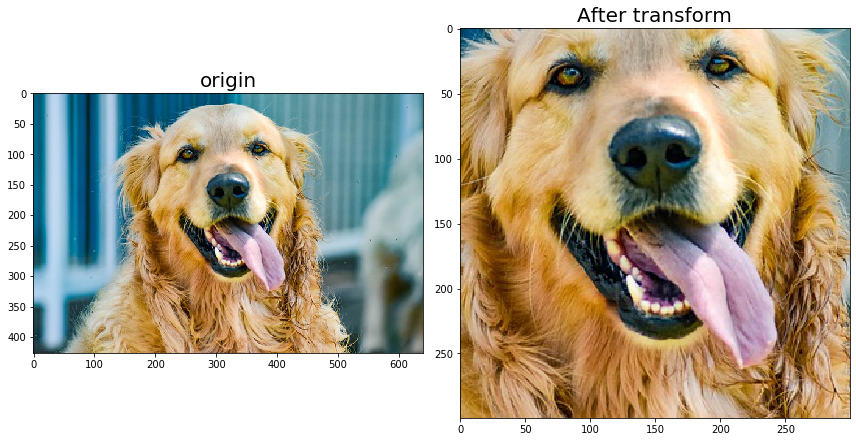

In [30]:
size = 300
transform = transforms.Compose([
    transforms.CenterCrop(size),
    transforms.ToTensor(),
])
show_dog(transform)

#### ColorJitter(brightness=0,contrast=0,saturation=0,hue=0)
画像の明るさ、コントラスト、彩度をランダムに変更
- brightness : 明るさをジッタリングする量
- contrast : コントラストをジッタリングする量
- saturation : 彩度をジッタリングする量
- hue : 色相をジッタリングする量

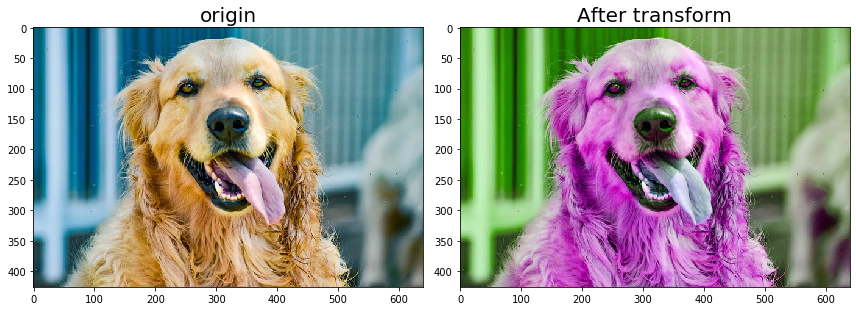

In [6]:
brightness = 0
contrast = 0
saturation = 0
hue = 0.5
transform = transforms.Compose([
    transforms.ColorJitter(brightness, contrast, saturation, hue),
    transforms.ToTensor(),
])
show_dog(transform)

#### FiveCrop(size)
四隅と中央に切り抜く  
tuple形式で左上、右上、左下、右下、真ん中の順で返される。

(640, 426)


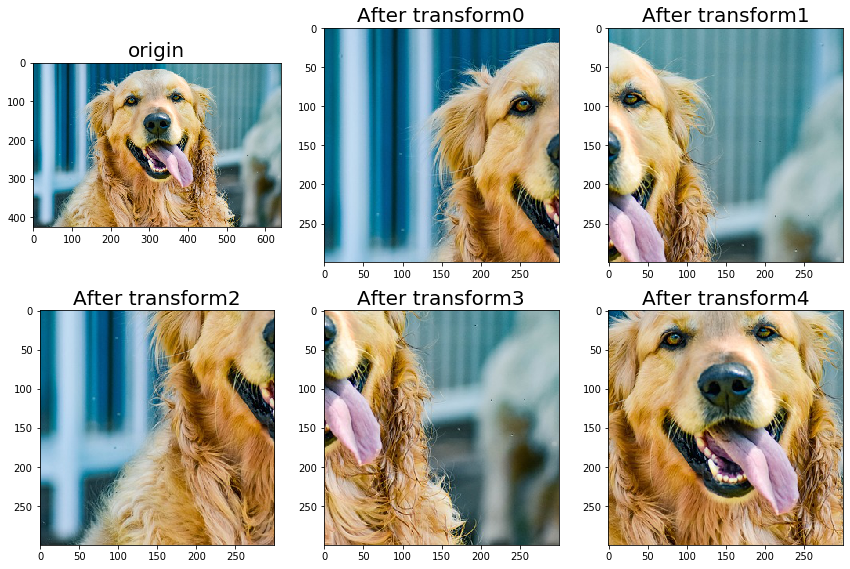

In [26]:
size = 300
transform = transforms.Compose([
    transforms.FiveCrop(size),
    lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops]) # 
])

#  元画像読み込み
image_file_path = './image/goldenretriever-3724972_640.jpg'
img = Image.open(image_file_path)  # [高さ][幅][色RGB]
    
# 元の画像の表示
fig = plt.figure(figsize=(12,8))
fig.add_subplot(2, 3, 1)
plt.imshow(img)
plt.title('origin',size=20)
print(img.size)


# 画像の変換    
for i in range(5):
    fig.add_subplot(2, 3, i+2)
    img_transformed = transform(img)
    img_transformed = img_transformed[i].numpy().transpose((1, 2, 0))
    plt.imshow(img_transformed)
    plt.title('After transform'+str(i),size=20)
fig.tight_layout()
plt.show()

#### Grayscale(num_output_channels=1)
画像をグレースケールに変換する
- num_output_channels : 出力イメージに必要なチャネルの数

(640, 426)
272640


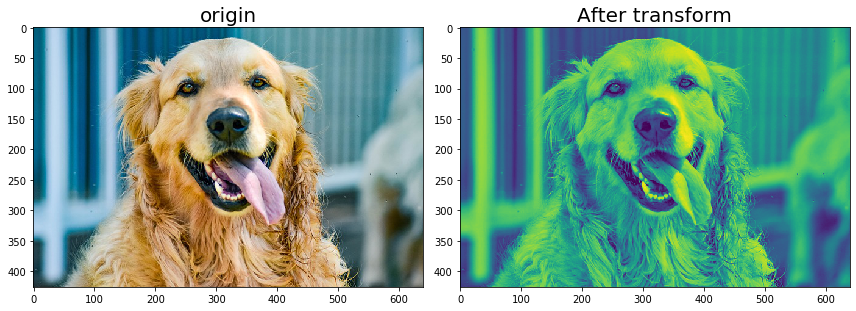

In [8]:
num_output_channels = 1
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels),
    transforms.ToTensor(),
])

#  元画像読み込み
image_file_path = './image/goldenretriever-3724972_640.jpg'
img = Image.open(image_file_path)  # [高さ][幅][色RGB]
    
# 元の画像の表示
fig = plt.figure(figsize=(12,8))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title('origin',size=20)
print(img.size)

fig.add_subplot(1, 2, 2)
img_transformed = transform(img)# torch.Size([3, 224, 224])
print(img_transformed.numpy().size)
img_transformed = img_transformed.numpy().transpose((1, 2, 0))
img_transformed = np.clip(img_transformed, 0, 1)
img_transformed = img_transformed.reshape([img.size[1],img.size[0]])
plt.imshow(img_transformed)
plt.title('After transform',size=20)
fig.tight_layout()  
plt.show()

#### Pad(padding, fill=0, padding_mode='constant')
与えられたパッド値を使用して、画像のすべての側面に埋め込む
- padding : どれくらい埋め込むか
- fill : 埋め込む値
- padding_mode : paddingのタイプ  
    constant : 定数値  
    edge : 画像の端に最後の値を

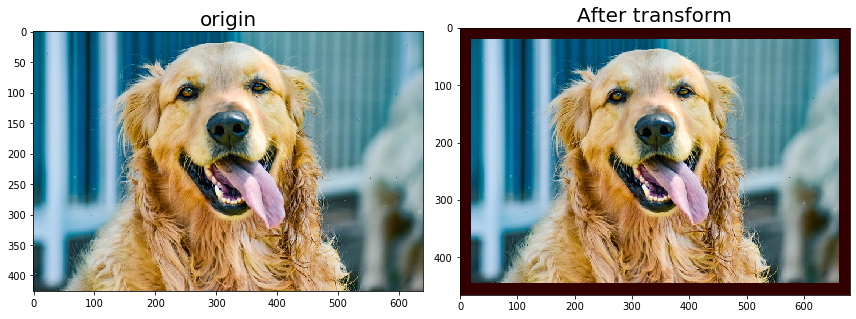

In [9]:
padding=20
fill=50
padding_mode = 'constant'
transform = transforms.Compose([
    transforms.Pad(padding, fill,padding_mode),
    transforms.ToTensor(),
])
show_dog(transform)

#### RandomAffine(degree, translate=None, scale=None, shear=None, resample=False, fillcolor=0)
中心不変を保つ[Affine変換](https://qiita.com/koshian2/items/c133e2e10c261b8646bf)
- degree : 回す度
- translate : 水平、垂直の平行移動の最大絶対分数のタプル
- scale : スケーリング係数間隔
- shear : 斜めに変化。選択する角度の範囲
- fillcolor : 出力画像の変換外の領域のオプションの塗りつぶし色

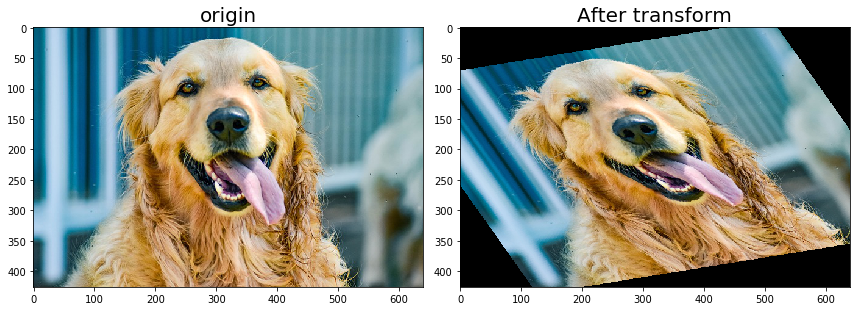

In [113]:
degree = 30
transform = transforms.Compose([
    transforms.RandomAffine(degree, translate=None, scale=None, shear=30, resample=False, fillcolor=0),
    transforms.ToTensor(),
])
show_dog(transform)

#### RandomCrop(size, padding=None, pad_if_needed=False, fill=0, padding_mode='constant')
画像のランダムな位置をクロップする
- size : クロップするサイズ
- 

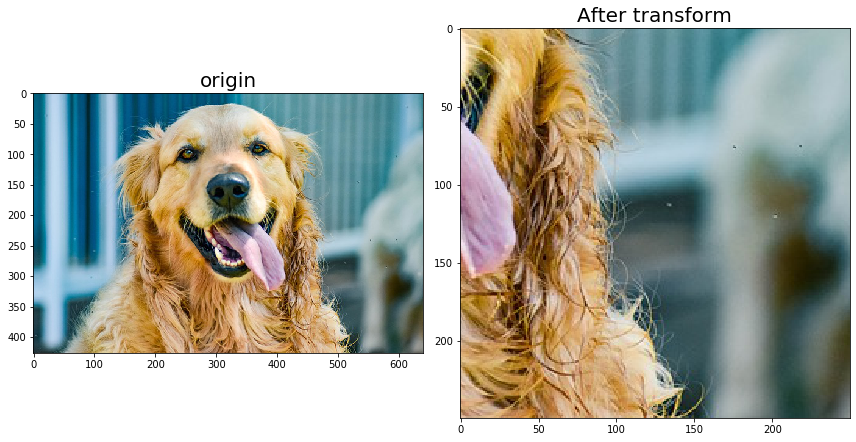

In [17]:
size = 250

transform = transforms.Compose([
    transforms.RandomCrop(size=size,padding=30,pad_if_needed=False,fill=0,padding_mode='constant'),
    transforms.ToTensor(),
])
show_dog(transform)

#### RandomGrayscale(p=0.1)
与えられた確率で画像をグレースケールにする

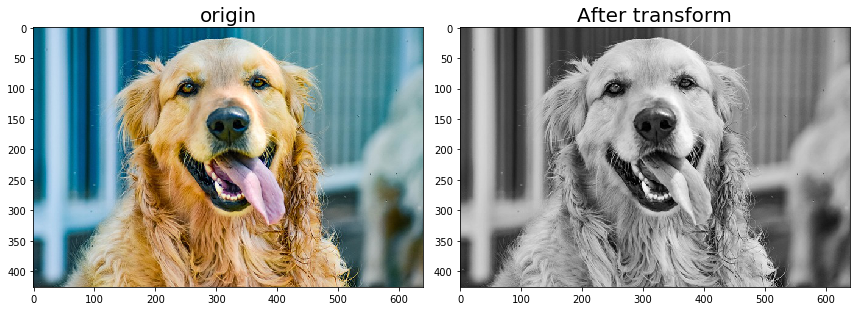

In [24]:
p = 0.1
transform = transforms.Compose([
    transforms.RandomGrayscale(p=p),
    transforms.ToTensor(),
])
show_dog(transform)

#### RandomHorizontalFlip(p=0.5)
与えられた確率で画像を水平にフリップする


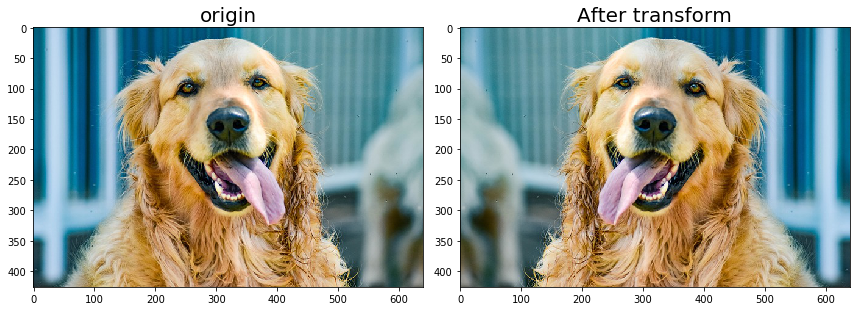

In [27]:
p = 0.5
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=p),
    transforms.ToTensor(),
])
show_dog(transform)

#### RandomPerspective(distortion_scale=0.5,p=0.5,interpolation=3)
与えられた確率で画像を透視変換させる
- distortion_scale : 歪みの度合い

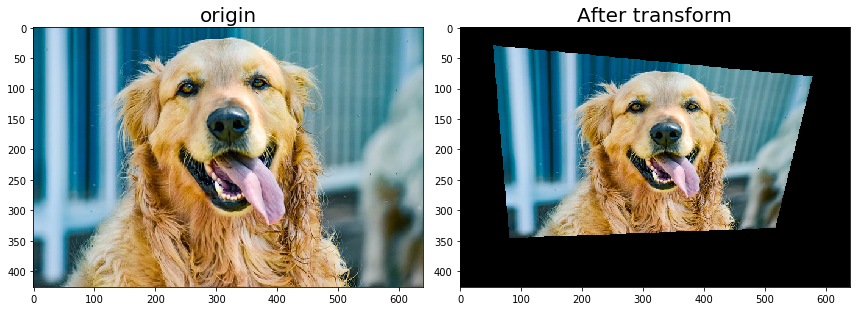

In [30]:
distortion_scale = 0.5
p = 0.5
interpolation = 3

transform = transforms.Compose([
    transforms.RandomPerspective(distortion_scale=distortion_scale, p=p, interpolation=interpolation),
    transforms.ToTensor(),
])
show_dog(transform)

#### RandomResizedCrop(size,scale=(0.08, 1.0), ratio=(0.75,1.3333333),interpolation=2)
画像をランダムなサイズとアスペクト比にクロップ
- ratio : アスペクト比の範囲(default: of 3/4 to 4/3)
- scale : 切り取られる元のサイズのサイズの範囲

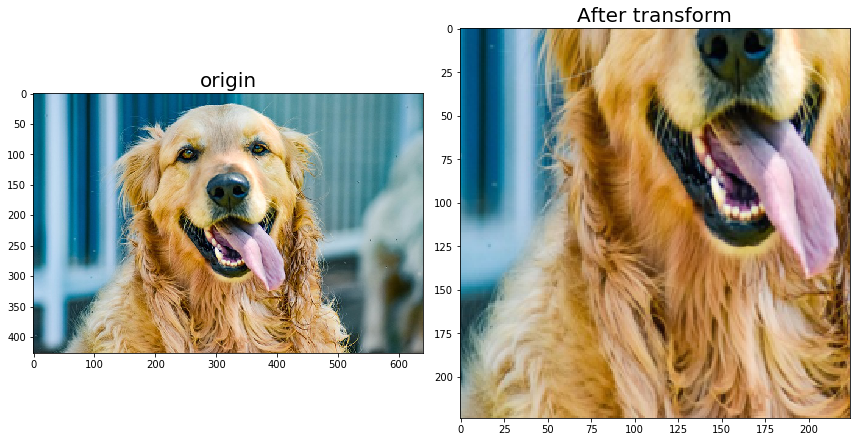

In [36]:
size = 224

transform = transforms.Compose([
    transforms.RandomResizedCrop(size,interpolation=2),
    transforms.ToTensor(),
])
show_dog(transform)

#### RandomRotation(degrees, resample=False, expand=False, center=None)
画像を回す
- degrees : 回転範囲(-degrees, degrees)
- expand : 拡張フラグ(T or F)

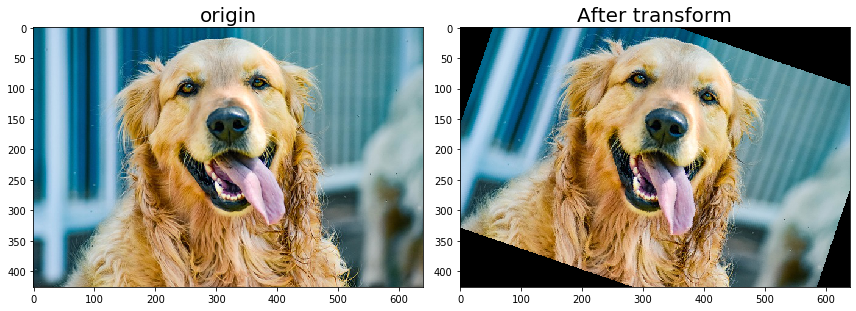

In [40]:
degrees = 90

transform = transforms.Compose([
    transforms.RandomRotation(degrees=degrees),
    transforms.ToTensor(),
])
show_dog(transform)

#### RandomVerticalFlip(p=0.5)
垂直にフリップ

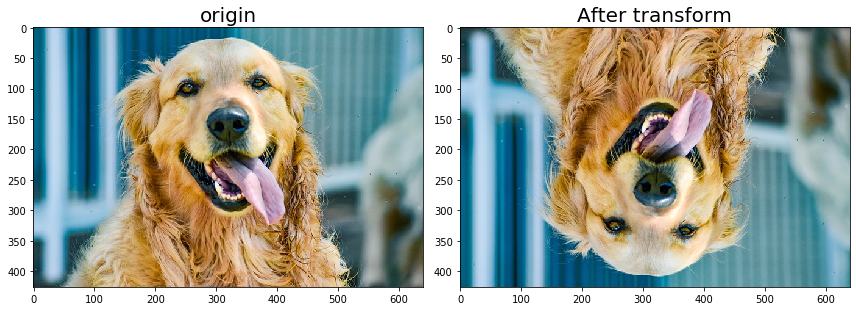

In [43]:
p = 0.5
transform = transforms.Compose([
    transforms.RandomVerticalFlip(p=p),
    transforms.ToTensor(),
])
show_dog(transform)

#### Resize(size)
リサイズ

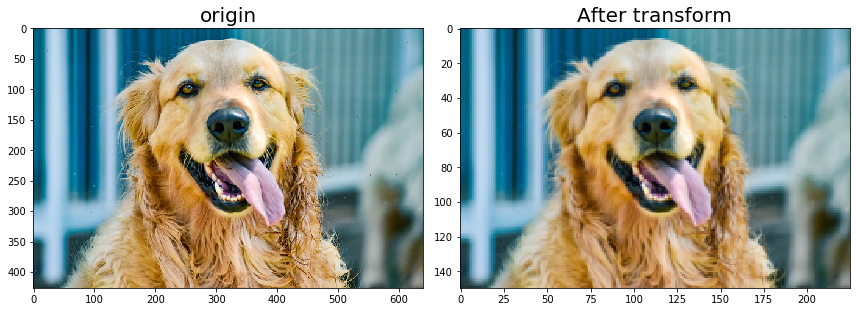

In [44]:
size = 150
transform = transforms.Compose([
    transforms.Resize(size=size),
    transforms.ToTensor(),
])
show_dog(transform)

#### TenCrop(size, vertical_flip=False)
画像を四隅に切り取り、中央の切り取りにこれらの反転バージョンを加える

(640, 426)


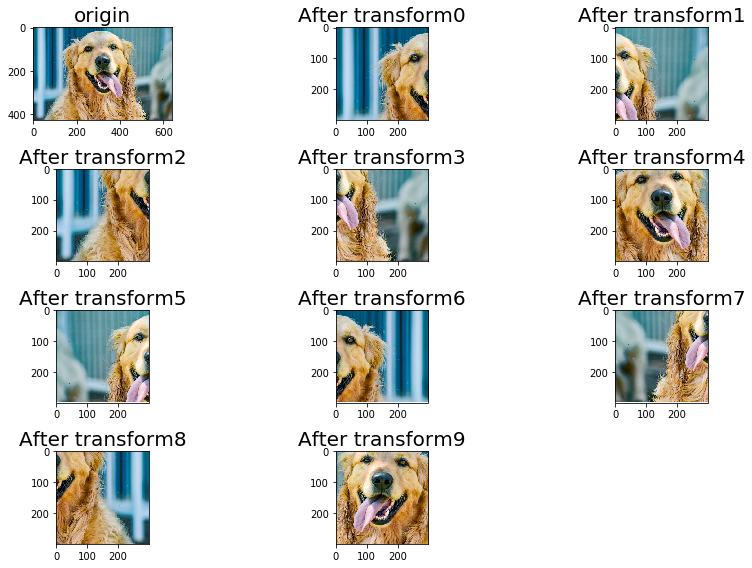

In [25]:
size = 300
transform = transforms.Compose([
    transforms.TenCrop(size=size),
    lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops]),
])

#  元画像読み込み
image_file_path = './image/goldenretriever-3724972_640.jpg'
img = Image.open(image_file_path)  # [高さ][幅][色RGB]
    
# 元の画像の表示
fig = plt.figure(figsize=(12,8))
fig.add_subplot(4, 3, 1)
plt.imshow(img)
plt.title('origin',size=20)
print(img.size)

# 画像の変換    
# torch.Size([3, 224, 224])
for i in range(10):
    fig.add_subplot(4, 3, i+2)
    img_transformed = transform(img)
    img_transformed = img_transformed[i].numpy().transpose((1, 2, 0))
    plt.imshow(img_transformed)
    plt.title('After transform'+str(i),size=20)
fig.tight_layout()
plt.show()

#### Normalize(mean, std, inplace=False)
画像の正規化

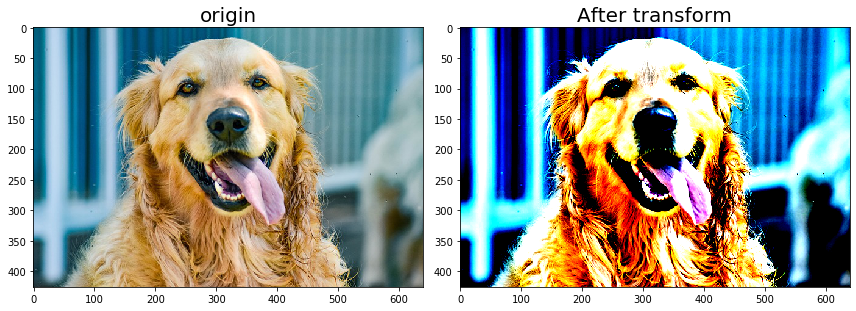

In [28]:
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std), ## 順番注意！　先にテンソルに直してから
])
show_dog(transform)

### Transformationsについて
- RandomApply(transfroms,p=0.5) : 与えられた確率だけtransformを使う
- RandomChoice(transforms) : 一つだけ適用
- RandomOrder(transforms) : ランダムに並べ替えられた順番でtransform

### Conversion Transforms
- ToPILImage
- ToTensor